# 🌐 **Application to Acoustic Scene Classification**

# **Part 2**: Application of the entropy triangle to understand the training in ASC

Author of the notebook: *Claudia Montero Ramírez*

Notebook based on the paper: 

Reference to the paper: *100% Classification Accuracy Considered Harmful: The Normalized Information Transfer Factor Explains the Accuracy Paradox*. 
    Francisco J. Valverde-Albacete ,
    Carmen Peláez-Moreno.
    https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0084217


All **Audio Tagging problems exhibit a highly imbalanced nature**. In our daily lives, we usually spent much more time in some places than in others - such as Home or Work, rather than in the airport - (ASC), or even we listen some acoustic events more than others - Silence rather than Speech - (SED). 

🔺 That's why is crucial to analyze the behaviour of class balancing methods through the framework of the entropy triangle.

In [1]:
fold = 0

## 🧠 **Dataset**

We use the TAU Urban Acoustic Scenes 2022 Mobile dataset. By default, the label distribution corresponding to the dataset used for this paper is almost uniform. Then, to illustrate the effects of real-life label distributions, the training set is linearly imbalanced and reduced.

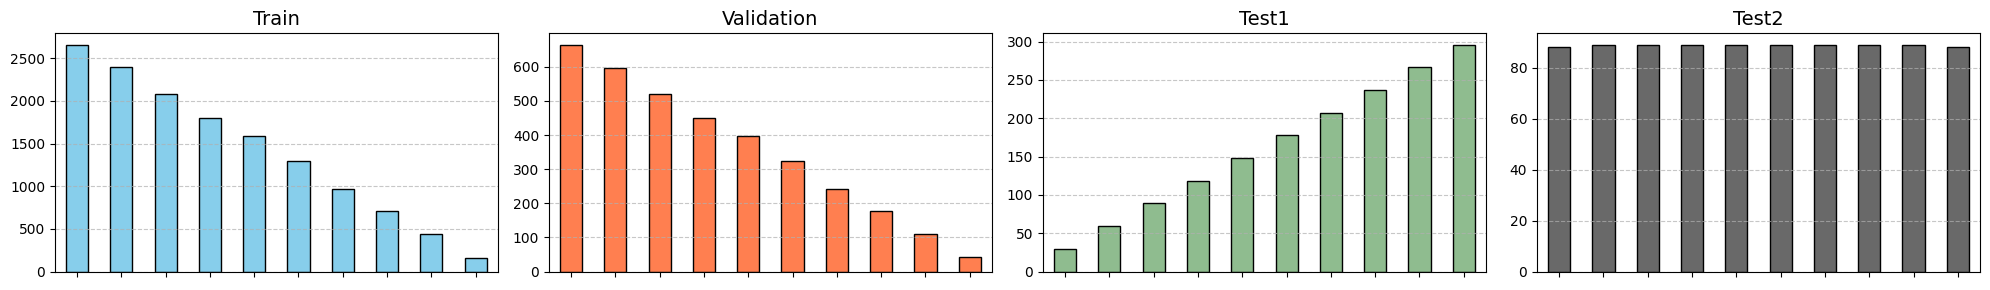

In [2]:
from src.plot_triangle import * 

labels_path = './labels'
plot_labels_histogram(labels_path, fold=fold)

## 🖇️ **Balancing methods**: Apply weights to the loss function during training

In [3]:
from src.compute_many import *

results_path = './results/cms'

### 🪢 **Method 1**
The class-weighting parameter $w_i$ is introduced in the cross-entropy loss.
\begin{equation}
w_{i} = \frac{1}{p_i \cdot C}
\end{equation}

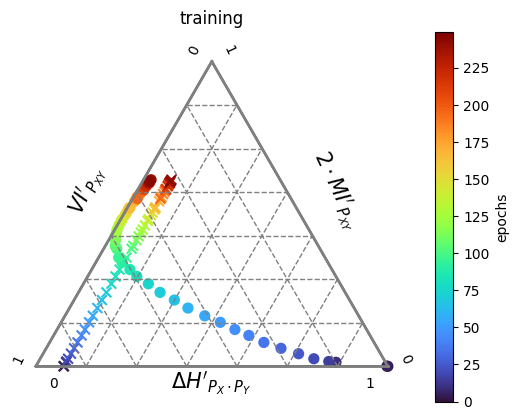

In [4]:
loss_type = 'weighted_loss'

group = 'training' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group, step=5)

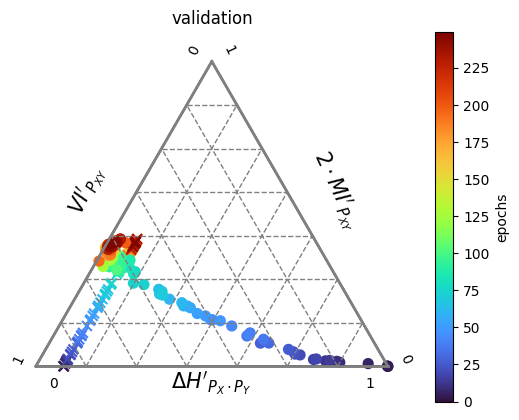

In [5]:
group = 'validation' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group, step=2)

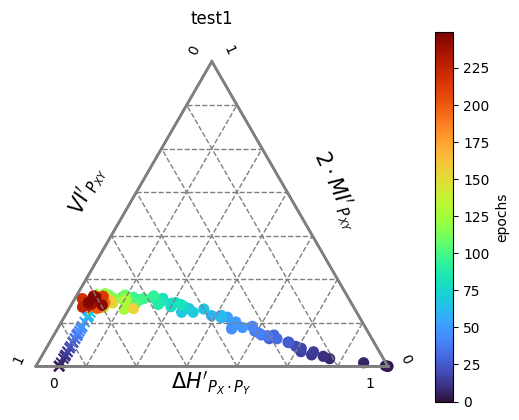

In [6]:
group = 'test1' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group, step=2)

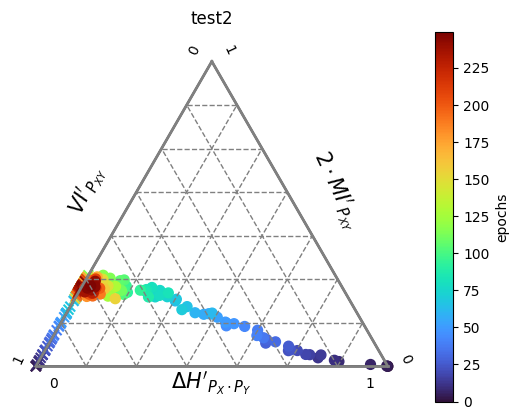

In [7]:
group = 'test2' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group, step=2)

### 🤪 **Method 2**

No weighting in the loss function, that is:
\begin{equation}
    w_{i} = 1  \   \ \ \forall      i
\end{equation}

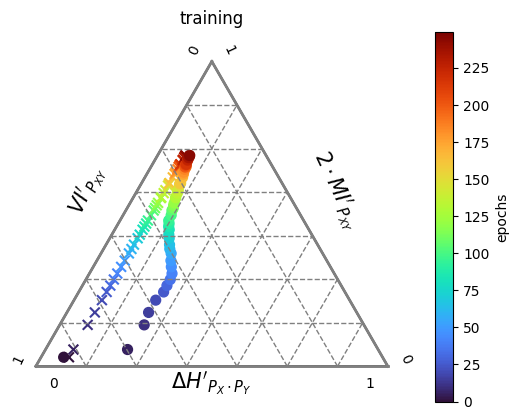

In [8]:
loss_type = 'normal_loss'

group = 'training' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group, step=5)

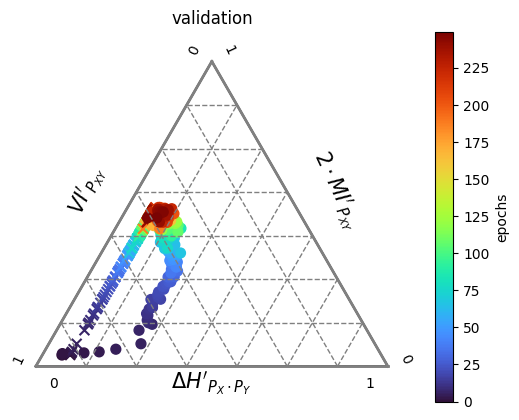

In [9]:
group = 'validation' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group)

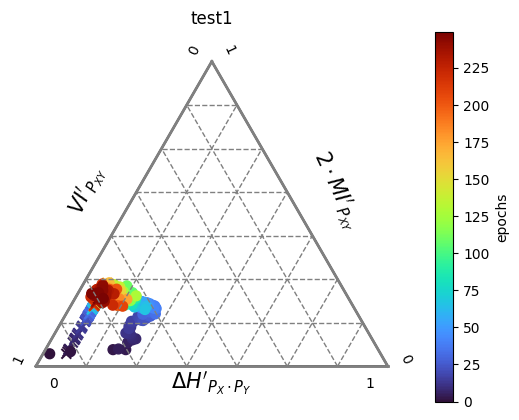

In [10]:
group = 'test1' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group)

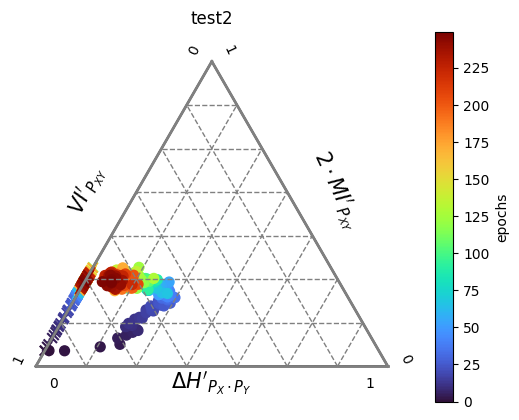

In [11]:
group = 'test2' # choices = ['training', 'validation', 'test1', 'test2']

all_x_points_array, all_y_points_array = compute_metrics(results_path, loss_type, fold, group)
plot_many_coordinates(all_x_points_array, all_y_points_array, cmap_name='turbo', size=50, title=group)

## 🧠 **Comparision**

Congratulations!! Now you have learned how to use the entropic triangle to see training trajectories.

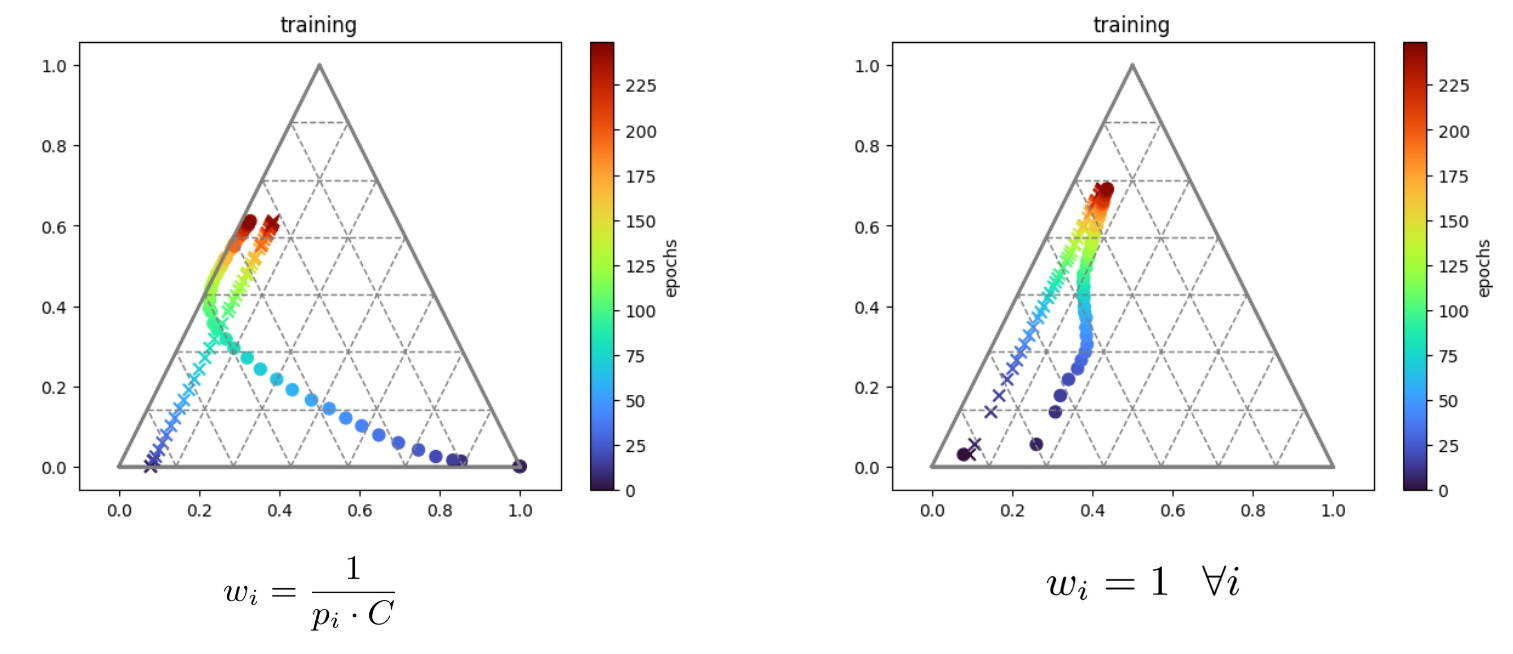

* 🤗 Could you now understand why this is happening?

For more information write me an email: clmonter@pa.uc3m.es

# 🙉 Appendix: Compare different models

There is also a function in case you want to compare the performance of different models at the same time!

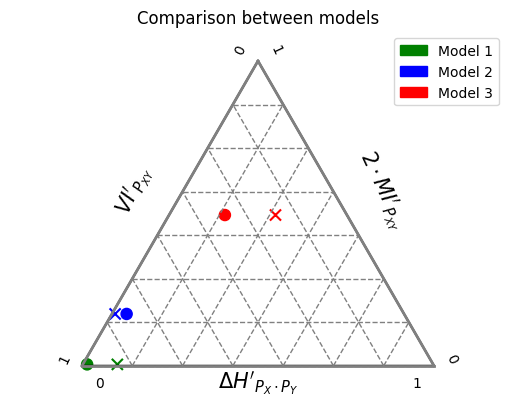

In [13]:
from src.compute_many import *

cm1 = np.array([[5,6,7], [1,2,3], [6,7,8]])
cm2 = np.array([[7,8,14], [6,17,1], [5,5,24]])
cm3 = np.array([[0,16,17], [1,0,3], [65,4,0]])

confussion_matrices = [cm1,cm2,cm3]
colors = ['Green', 'Blue', 'Red']
names = ['Model 1', 'Model 2', 'Model 3']
size = 64
title = 'Comparison between models'

plot_different_models(confussion_matrices, colors, names, size, title)